# Regressão

Material derivado do curso de Machine Learning da IBM: <br>
https://www.coursera.org/learn/machine-learning-with-python

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [3]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"


--2022-04-29 10:36:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Carregou certificado CA "/etc/ssl/certs/ca-certificates.crt"
Resolvendo cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Conectando-se a cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 72629 (71K) [text/csv]
Salvando em: “FuelConsumptionCo2.csv.1”

FuelConsumptionCo2. 100%[===================>]  70,93K   251KB/s    em 0,3s    

2022-04-29 10:36:42 (251 KB/s) - “FuelConsumptionCo2.csv.1” salvo [72629/72629]



## FuelConsumption.csv

O dataset que você baixou contém dados de consumo de combustível de diferentes modelos de veículos a partir das quais é possíveis estimar a taxa de emissão de CO2. A seguir uma breve descrição de cada atributo.

    MODELYEAR e.g. 2014
    MAKE e.g. Acura
    MODEL e.g. ILX
    VEHICLE CLASS e.g. SUV
    ENGINE SIZE e.g. 4.7
    CYLINDERS e.g 6
    TRANSMISSION e.g. A6
    FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
    FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
    FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
    CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0 #variável objetivo


A seguir utilizamos as seguintes funções:
- `df.head()`: apresenta as primeiras 5 amostras da base e todos os seus atributos.
- `df.describe()`: Apresenta estastísticas gerais de cada atributo.

In [4]:
df = pd.read_csv("FuelConsumptionCo2.csv")
display(df.head())
df.describe()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Q1. Regressão Simples

A variável que gostaríamos de prever é a `CO2EMISSIONS`. Faremos nessa primeira atividade uma regressão simples, onde a partir de uma única variável, vamos modelar a predição da variável objetivo.

- Plot o espalhamento de cada uma das variáveis em relação à emissão de CO2 (função scatter do matplotlib, `plt.scatter`)
- Plot também a matriz de correlação (`df.corr`)
- Selecione a variável mais correlacionada para alimentar nosso modelo no passo seguinte.
> Note que as bibliotecas necessárias já foram importadas no início deste documento.

Espalhamento das vaiáveis em relação à emissão de CO2


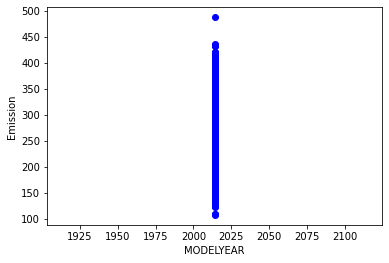

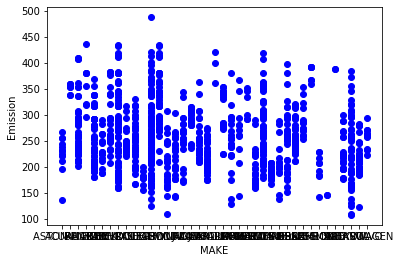

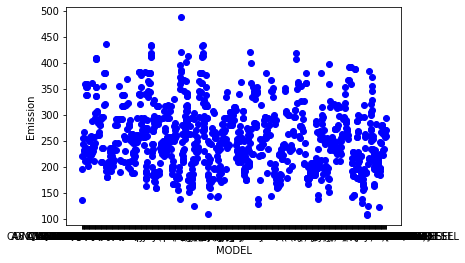

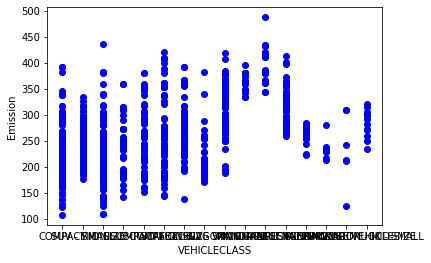

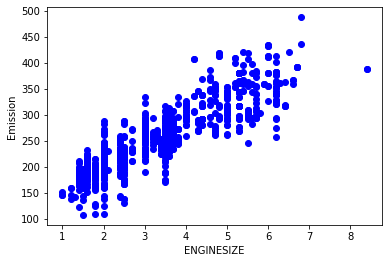

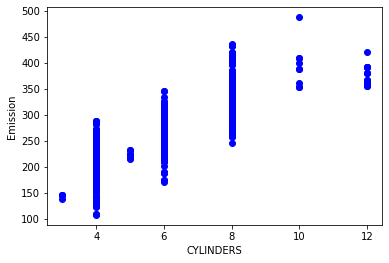

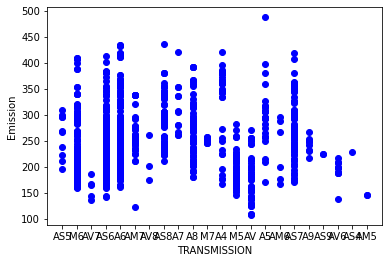

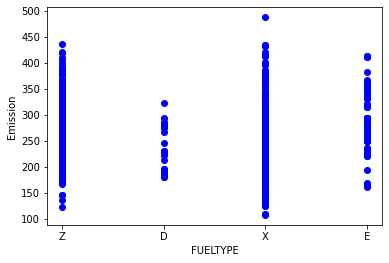

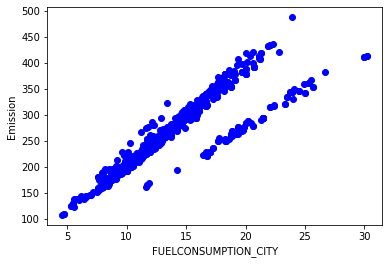

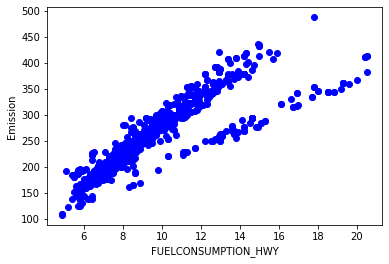

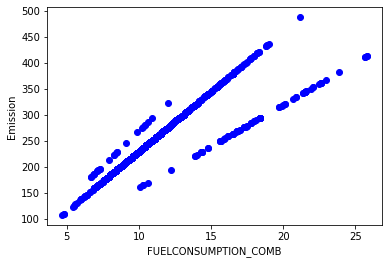

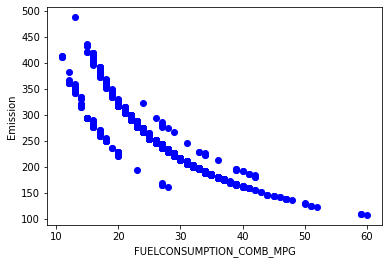

In [15]:
## reg_model =  ....

df_semCo2Emission = df.copy()
del df_semCo2Emission['CO2EMISSIONS']

print('Espalhamento das vaiáveis em relação à emissão de CO2')
for column in df_semCo2Emission:
    plt.scatter(df[column], df['CO2EMISSIONS'],  color='blue')
    plt.xlabel(column)
    plt.ylabel("Emission")
    plt.show()    

In [18]:
print('Matriz de correlação:')
df.corr().sort_values(by=['CO2EMISSIONS'], ascending=False)

Matriz de correlação:


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
print('Variável mais correlatada -> FUELCONSUMPTION_CITY')

Variável mais correlatada -> FUELCONSUMPTION_CITY


**Realize a regressão linear simples com a variável selecionada no passo anterior. Use o pacote sklearn.**
- Separe os dados em treino e teste
- Ajuste o modelo no treino
- Imprima as métricas R2 score e a média dos resíduos ao quadrado (MSE) em ambos o treino e o teste.

In [72]:
from sklearn import linear_model
import sklearn.metrics

# Método de regressão
regr = linear_model.LinearRegression()

# Porcentagem de dados de treino
PORCENT_DATA_TRAIN = 0.8

train_x = np.array(df["FUELCONSUMPTION_CITY"][:int(PERCENTAGE_TRAIN_DATA*len(df["FUELCONSUMPTION_CITY"]))]).reshape(-1, 1)
test_x  = np.array(df["FUELCONSUMPTION_CITY"][int(PERCENTAGE_TRAIN_DATA*len(df["FUELCONSUMPTION_CITY"])) + 1:]).reshape(-1, 1)

train_y = np.array(df["CO2EMISSIONS"][:int(PERCENTAGE_TRAIN_DATA*len(df["CO2EMISSIONS"]))]).reshape(-1, 1)
test_y  = np.array(df["CO2EMISSIONS"][int(PERCENTAGE_TRAIN_DATA*len(df["CO2EMISSIONS"])) + 1:]).reshape(-1, 1)

# Regressão
fit = regr.fit(train_x, train_y)
predict = regr.predict(np.array(test_x).reshape(-1,1))

**Plot o modelo resultante de seu treinamento**

Coeficients:  [[13.45982265]]
Intercept:  [76.18160605]
R2 score = 0.877236977648196
MSE score = 429.46672813428967


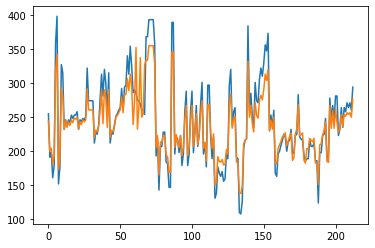

In [73]:
plt.plot(test_y)
plt.plot(predict)

# Coeficientes encontrados
print ('Coeficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

# R2 
score_r2 = sklearn.metrics.r2_score(test_y, predict)
print(f'R2 score = {score_r2}')

# MSE
score_mse = sklearn.metrics.mean_squared_error(test_y, predict)
print(f'MSE score = {score_mse}')

## Q2. Regressão polinomial

Para dados que não são linearmente separados, modelos polinomiais podem oferecer complexidade mais adequada. 

A função PolynomialFeatures() na biblioteca Scikit-learn pode nos ajudar nessa tarefa, já que ela gera uma matriz composta pelas combinações polinomiais das características do atributo. Por exemplo, digamos que o conjunto original tenha apenas um recurso, `ENGINESIZE`. Agora, se selecionarmos o grau do polinômio como 2, ele gerará 3 recursos, grau=0, grau=1 e grau=2.

**Realize a regressão polinomial a partir de `ENGINESIZE`**
- Extraia combinações polinomiais do atributo (experimente pelo menos dois diferentes graus de polinômio) 
- Alimente as características polimomias ao modelo de Regressão Linear

> Lembre-se de treinar em um conjunto e testar em outro. Meça a qualidade dos modelos produzidos em cada experimento. **Qual deles produziu a melhor resultado de teste?**

Predição de segundo grau


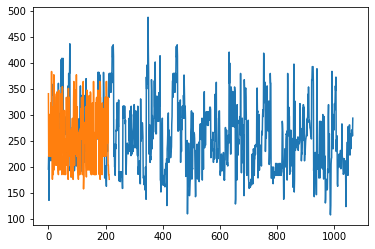

R2 score = 0.7237141291367737
MSE score = 1166.3367919243976

Predição de terceiro grau


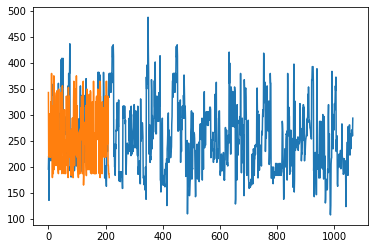

R2 score = 0.7232382715273291
MSE score = 1168.3456179127782

A predição de segundo grau foi levemente melhor que a de terceiro grau!


In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df['ENGINESIZE'])
Y = np.array(df['CO2EMISSIONS'])

scale = StandardScaler()
X = scale.fit_transform(X.reshape(-1,1))

# Separando arrays em test e train
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=False)

# Funções polinomiais
# Segundo grau
segundo_grau = PolynomialFeatures(degree=2)
X_segundo_grau = segundo_grau.fit_transform(train_x)
segundo_grau.fit(train_x, train_y)

model = LinearRegression()
model.fit(X_segundo_grau, train_y)

predict_y_segundo_grau = model.predict(segundo_grau.fit_transform(test_x))

# Terceiro grau
terceiro_grau = PolynomialFeatures(degree=3)
X_terceiro_grau = terceiro_grau.fit_transform(train_x)
terceiro_grau.fit(train_x, train_y)

model = LinearRegression()
model.fit(X_terceiro_grau, train_y)

predict_y_terceiro_grau = model.predict(terceiro_grau.fit_transform(test_x))

# Predição de segundo grau
print('Predição de segundo grau')
plt.plot(Y)
plt.plot(predict_y_segundo_grau)
plt.show() 

# R2 
score_r2 = sklearn.metrics.r2_score(test_y, predict_y_segundo_grau)
print(f'R2 score = {score_r2}')
# MSE
score_mse = sklearn.metrics.mean_squared_error(test_y, predict_y_segundo_grau)
print(f'MSE score = {score_mse}')

# Predição de terceiro grau
print('')
print('Predição de terceiro grau')
plt.plot(Y)
plt.plot(predict_y_terceiro_grau)
plt.show() 

# R2 
score_r2 = sklearn.metrics.r2_score(test_y, predict_y_terceiro_grau)
print(f'R2 score = {score_r2}')
# MSE
score_mse = sklearn.metrics.mean_squared_error(test_y, predict_y_terceiro_grau)
print(f'MSE score = {score_mse}')

print('')
print('A predição de segundo grau foi levemente melhor que a de terceiro grau!')

## Q3. Regressão multivariada

Na realidade, existem múltiplas variáveis que impactam a emissão de co2. Quando mais de uma variável independente está presente, o processo é chamado de regressão linear múltipla. Um exemplo de regressão linear múltipla é prever a emissão de co2 usando os recursos `FUELCONSUMPTION_COMB`, `ENGINESIZE` e `CYLINDERS`. O bom aqui é que o modelo de regressão linear múltipla é a extensão do modelo de regressão linear simples.

**Realize a regressão multivariada com as seguintes variáveis**
- As três mencionadas no enunciado
- Substitua `FUELCONSUMPTION_COMB` por `FUELCONSUMPTION_CITY` e `FUELCONSUMPTION_HWY` 

> Lembre-se de treinar em um conjunto e testar em outro. Lembre-se que para cada experimento deve-se medir a qualidade dos modelos. Aproveite e reflita sobre o que pode ter afetado as diferenças na acurácia.

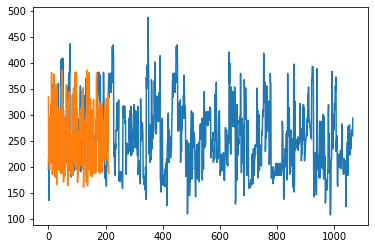

R2 score = 0.8604199405627128
MSE score = 589.235194083791


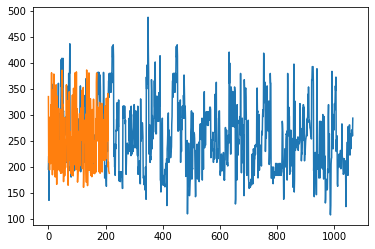

R2 score = 0.8599443136450632
MSE score = 591.2430462101088

Foi necessário colocar Random State = 0, pois para cada vez que rodava o código novamente mudava discrepantemente os resultados!
É notório uma diferença entre os dois plots!
Considerando que os valores que foram usados nos dois treinos são diferentes a regressão encontrará uma equação diferente para as duas.
Considerando, também, que o plot é multivariado e que ambas possuem os mesmos valores provindos de ENGINESIZE e CYLINDERS, grande parte do fit feito será usando os mesmos valores e, com isso, o coeficiente e o intercepto serão bastante próximos.

Coeficiente 1: [ 8.98695981 11.98993058  7.54469599]	Intercepto: 69.0522099255382
Coeficiente 2: [ 4.7423976   4.29566523 11.99897826  7.61636533]	Intercepto: 68.93070802166534


In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np

X = df[['FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']]
Y = df['CO2EMISSIONS']

# Separando arrays em test e train
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=.2, random_state=0)

regr = LinearRegression()
regr.fit(train_x, train_y)

predict = regr.predict(test_x)

plt.plot(Y)
plt.plot(predict)
plt.show()

# R2 
score_r2 = sklearn.metrics.r2_score(test_y, predict)
print(f'R2 score = {score_r2}')
# MSE
score_mse = sklearn.metrics.mean_squared_error(test_y, predict)
print(f'MSE score = {score_mse}')

# Resolvendo segundo item
X2 = df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','ENGINESIZE','CYLINDERS']]

# Separando arrays em test e train
train_x, test_x, train_y, test_y = train_test_split(X2, Y, test_size=.2, random_state=0)

regr2= LinearRegression()
regr2.fit(train_x, train_y)

predict2 = regr2.predict(test_x)

plt.plot(Y)
plt.plot(predict2)
plt.show()

# R2 
score_r2 = sklearn.metrics.r2_score(test_y, predict2)
print(f'R2 score = {score_r2}')
# MSE
score_mse = sklearn.metrics.mean_squared_error(test_y, predict2)
print(f'MSE score = {score_mse}')

# Resultado das predições
print('')
print('Foi necessário colocar Random State = 0, pois para cada vez que rodava o código novamente mudava discrepantemente os resultados!')
print("""É notório uma diferença entre os dois plots!
Considerando que os valores que foram usados nos dois treinos são diferentes a regressão encontrará uma equação diferente para as duas.
Considerando, também, que o plot é multivariado e que ambas possuem os mesmos valores provindos de ENGINESIZE e CYLINDERS, grande parte do fit feito será usando os mesmos valores e, com isso, o coeficiente e o intercepto serão bastante próximos.
""")
print(f'Coeficiente 1: {regr.coef_}\tIntercepto: {regr.intercept_}')
print(f'Coeficiente 2: {regr2.coef_}\tIntercepto: {regr2.intercept_}')

